<a href="https://colab.research.google.com/github/ben854719/EstateMind-AI-Your-Real-Estate-AI-Avatar-Assistant/blob/main/Survey_and_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython import get_ipython
from IPython import display
import uuid
import time
from dataclasses import dataclass, asdict
from typing import Optional, List, Dict, Any
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# 1. DATA MODEL

@dataclass
class ClientSurvey:
    session_id: str
    user_id: Optional[str]
    timestamp: float

    # Core satisfaction metrics
    csat: int                 # 1–5
    nps: int                  # 0–10
    ease_of_use: int          # 1–5
    product_improvement: str  # free text

    # Usage context
    feature_used: str
    used_within_30d: bool

    # Operational signals
    issue_reported: bool
    issue_resolved: Optional[bool]


# IN-MEMORY STORAGE (primary).

SURVEY_STORE: List[ClientSurvey] = []


def save_survey_memory(survey: ClientSurvey):
    """Save survey to in-memory list."""
    SURVEY_STORE.append(survey)


def get_all_surveys_memory() -> List[ClientSurvey]:
    """Return all surveys from memory."""
    return SURVEY_STORE


#  OPTIONAL JSONL STORAGE (persistent, lightweight).

DATA_PATH = Path("client_survey.jsonl")

def save_survey_jsonl(survey: ClientSurvey):
    """Append survey as JSON to a JSONL file."""
    with DATA_PATH.open("a", encoding="utf-8") as f:
        f.write(json.dumps(asdict(survey)) + "\n")


def load_surveys_jsonl() -> List[Dict[str, Any]]:
    """Load all surveys from JSONL file."""
    if not DATA_PATH.exists():
        return []
    with DATA_PATH.open("r", encoding="utf-8") as f:
        return [json.loads(line) for line in f]


# SURVEY CREATION HELPERS.

def create_survey(
    user_id: Optional[str],
    csat: int,
    nps: int,
    ease_of_use: int,
    product_improvement: str,
    feature_used: str,
    used_within_30d: bool,
    issue_reported: bool,
    issue_resolved: Optional[bool]
) -> ClientSurvey:
    """Create a fully populated survey object."""
    return ClientSurvey(
        session_id=str(uuid.uuid4()),
        user_id=user_id,
        timestamp=time.time(),
        csat=csat,
        nps=nps,
        ease_of_use=ease_of_use,
        product_improvement=product_improvement,
        feature_used=feature_used,
        used_within_30d=used_within_30d,
        issue_reported=issue_reported,
        issue_resolved=issue_resolved
    )


def example_survey(user_id: Optional[str] = None) -> ClientSurvey:
    """Generate a realistic example survey for testing."""
    return create_survey(
        user_id=user_id,
        csat=4,
        nps=9,
        ease_of_use=5,
        product_improvement="More detailed listing insights",
        feature_used="listing_search",
        used_within_30d=True,
        issue_reported=False,
        issue_resolved=None
    )

#  ANALYTICS HELPERS (for dashboards).

def average(values: List[int]) -> float:
    return sum(values) / len(values) if values else 0.0


def compute_metrics(surveys: List[ClientSurvey]) -> Dict[str, float]:
    """Compute high-level satisfaction metrics."""
    return {
        "avg_csat": average([s.csat for s in surveys]),
        "avg_nps": average([s.nps for s in surveys]),
        "avg_ease_of_use": average([s.ease_of_use for s in surveys]),
        "issue_rate": sum(s.issue_reported for s in surveys) / len(surveys) if surveys else 0.0,
    }

# 6. MAIN EXECUTION.

if __name__ == "__main__":
    # Create example survey
    survey = example_survey("user_123")

    # Save to memory
    save_survey_memory(survey)

    # Save to JSONL (optional)
    save_survey_jsonl(survey)

    # Load and compute metrics
    all_surveys = get_all_surveys_memory()
    metrics = compute_metrics(all_surveys)

    print("Stored surveys:", all_surveys)
    print("Metrics:", metrics)

Stored surveys: [ClientSurvey(session_id='9980aed7-8aff-408c-900e-322bd7744fe1', user_id='user_123', timestamp=1769633442.7485583, csat=4, nps=9, ease_of_use=5, product_improvement='More detailed listing insights', feature_used='listing_search', used_within_30d=True, issue_reported=False, issue_resolved=None)]
Metrics: {'avg_csat': 4.0, 'avg_nps': 9.0, 'avg_ease_of_use': 5.0, 'issue_rate': 0.0}


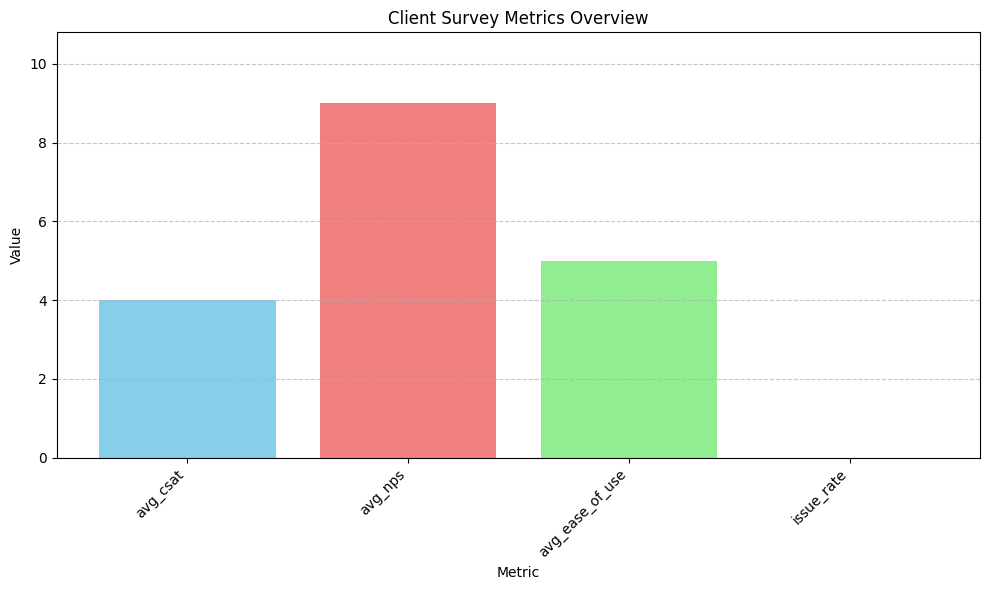

In [3]:
# Data Visualization

metrics = {'avg_csat': 4.0, 'avg_nps': 9.0, 'avg_ease_of_use': 5.0, 'issue_rate': 0.0}

labels = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Client Survey Metrics Overview')
plt.ylim(0, max(values) * 1.2 if values else 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
Description:

The graph shows that the average NPS from the client survey stands out as being significantly higher than the other metrics presented.